In [1]:
import imp
import numpy as np

import classes
imp.reload(classes)
from classes import fits_file, Cluster

import functions
imp.reload(functions)
from functions import Complete_Clusters_func, cluster_membership

from astropy.table import Table
from astropy import table

# Find cluster members

In [2]:
#read the DR156 file
DR16 = fits_file('allStar-r12-l33.fits', 'default')
data_new = DR16.data
#read the distance data
distance_data = fits_file("cbj_spectroPhotom_allStar_dr16beta_order.fits", 'default')        
data_new['D2_med'] = distance_data.data['D2_med']
#quality cuts
data_new = data_new[np.logical_and(data_new['VERR']<4,data_new['VSCATTER']<1)]
#read the Kharchenko catalog
Complete_Clusters = Complete_Clusters_func()

 
NGC 6791  Central stars= 87 ; Annulus Stars= 47  Total stars= 161
Found merged files
PM RA center -0.42345203798969144
PM DEC center -2.269219480248459
RV center -47.18914716567068


/Users/vijithjacob93/Documents/Repositories/Cluster_Homogeneity_Project/functions.py:276: RuntimeWarning: divide by zero encountered in log
  return np.sqrt(-2*np.log(probs))
/Users/vijithjacob93/Documents/Repositories/Cluster_Homogeneity_Project/functions.py:388: RuntimeWarning: divide by zero encountered in log
  prob_total=np.exp((A1*w1*np.log(prob_RV)+A2*w2*np.log(prob_PM))/(A1*w1+A2*w2))


Number of cluster stars= 60
age =  9.645


/Users/vijithjacob93/Documents/Repositories/Cluster_Homogeneity_Project/functions.py:632: UserWarning: p-value floored: true value smaller than 0.001
  AD_test = stats.anderson_ksamp([data_new_cluster['M_H'],data_annulus_stars['M_H']])


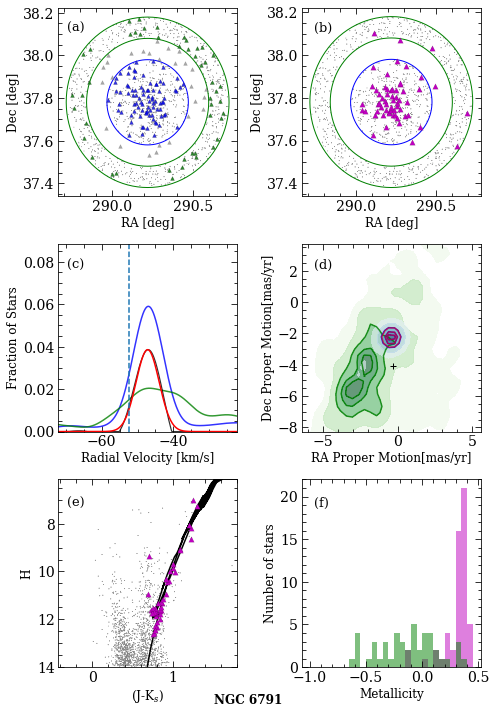

1.0

In [4]:
# membership for each cluster
cluster_membership('NGC 6791',data_new)

# Concatenate all the membership info

In [3]:
#Find the first cluster with membership info
for j in range(1,len(Complete_Clusters)):
#     if (Complete_Clusters.loc[j]['CLUSTER_STATUS']=='              '):
        try:
            f=Table.read("Files/"+\
                         Complete_Clusters['NAME'][j]+"_members_and_background_Kharchenko.dat",format='ascii')
            break
        except:
            pass
#define the full table
full_table=f
#iterate over other membership info and add to full table
for i in range(j+1,len(Complete_Clusters)):
#     if (Complete_Clusters.loc[i]['CLUSTER_STATUS']=='              '):
        try:
            filename="Files/"+\
                                    Complete_Clusters['NAME'][i]+"_members_and_background_Kharchenko.dat"
            f=Table.read(filename,format='ascii')
            full_table= table.vstack([full_table,f])
        except:
            pass

In [4]:
full_table

Cluster,APOGEE_ID,RA,DEC,GLON,GLAT,no_sigmas_RV,no_sigmas_PM,no_sigmas_total,dist_center,log_age
str17,str18,float64,float64,float64,float64,float64,float64,float64,float64,float64
AH03 J0822-36.4,2M08205220-3627199,125.217527,-36.45554,254.871183536,0.0775501109122,inf,2.0778143201817927,inf,15.605498194273576,8.915
AH03 J0822-36.4,2M08210351-3615248,125.264644,-36.256897,254.729268084,0.221629961162,inf,4.94469229241377,inf,15.795369147067102,8.915
AH03 J0822-36.4,2M08210446-3617183,125.268619,-36.288418,254.757025013,0.206352335103,16.34683767565903,1.0106588110529118,11.58103046422693,14.641587020211327,8.915
AH03 J0822-36.4,2M08211189-3614112,125.299566,-36.236462,254.728466187,0.256417134242,20.84788100575545,1.9772171451933578,14.807827829722113,15.219426087330964,8.915
AH03 J0822-36.4,2M08211695-3615099,125.320633,-36.252762,254.751536427,0.261122731016,28.442230726734852,0.07806341275743478,20.11176996946355,13.80773112441297,8.915
AH03 J0822-36.4,2M08211919-3620402,125.329999,-36.344505,254.831285075,0.215144366018,23.62581841170711,1.6045109635935426,16.744458054163033,10.53602015460148,8.915
AH03 J0822-36.4,2M08211955-3614115,125.331494,-36.236534,254.743172316,0.277557990769,2.0735314920191894,0.23445656096583725,1.4755512067317849,14.101086331519634,8.915
AH03 J0822-36.4,2M08212588-3614401,125.357848,-36.24448,254.761801228,0.290516075494,3.808836023734043,0.3888628476563945,2.7072537902809923,12.884453801523012,8.915
AH03 J0822-36.4,2M08213587-3630144,125.399492,-36.504005,254.994255852,0.170336437942,20.877130843518685,1.3294774498582853,14.792263223507769,8.816411707467577,8.915


In [46]:
#save full table of cluster membership
# full_table.write('Data_Files/Cluster_members.fits',format='fits',overwrite=False)